<a href="https://colab.research.google.com/github/Emushame/ML_BAC4_UMK/blob/main/prediction_prix_maison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application2 : Prediction du prix d'une maison
## Features -


*   Superficie
*   Nbre chambres

*   Quartier
*   Type de maison





## 1. Importation des bibliotheques

In [31]:
import pandas as pd # pour le traitement des donnees
import numpy as np # pour les calculs numeriques/mathematiques
import matplotlib.pyplot as plt # pour la visualisation des graphiques
import seaborn as sns # pour la visualisation

from sklearn.model_selection import train_test_split # pour decouper le dataset en train/test
from sklearn.linear_model import LinearRegression # pour le modele de regression lineaire

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # pour l'evaluation du modele

from sklearn.preprocessing import LabelEncoder # pour l'encodage des variables categorielles

## 2. Chargement des donnees

In [114]:
df = pd.read_csv('maisons_data.csv')

### 2.1 Pretraitement de donnees

In [115]:
df.head(100)

,superficie,nombre_de_chambres,quartier,type_maison,prix
0,7,2,RVA,moyenne,50
1,25,6,Quartier Latin,elementaire,400
2,8,1,Musonoie,Moyenne,25
3,30,4,Joli Site,moyenne,200
4,20,3,Kasulu,moyenne,60
...,...,...,...,...,...
57,300,5,Toyota,moyenne,200
58,600,7,Centre ville,moyenne,60
59,20,2,RVA,moyenne,300
60,8,3,Quartier Latin,grande,200


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   superficie          62 non-null     int64 
 1   nombre_de_chambres  62 non-null     int64 
 2   quartier            62 non-null     object
 3   type_maison         62 non-null     object
 4   prix                62 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ KB


In [117]:
df.isna().sum()

,0
superficie,0
nombre_de_chambres,0
quartier,0
type_maison,0
prix,0


- Il ya des valeurs manquantes dans la colonne prix
- Nous allons remplacer ces valeurs nulles par la mediane

In [118]:
mediane = df['prix'].median()
print(mediane)


250.0


In [119]:
df['prix'].fillna(mediane, inplace=True)

/tmp/ipython-input-2951484231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prix'].fillna(mediane, inplace=True)


In [120]:
df.head()

,superficie,nombre_de_chambres,quartier,type_maison,prix
0,7,2,RVA,moyenne,50
1,25,6,Quartier Latin,elementaire,400
2,8,1,Musonoie,Moyenne,25
3,30,4,Joli Site,moyenne,200
4,20,3,Kasulu,moyenne,60


In [121]:
df.shape

(62, 5)

In [122]:
df.describe()

,superficie,nombre_de_chambres,prix
count,62.000000,62.000000,62.000000
mean,141.629032,3.822581,256.129032
std,181.432030,1.674536,187.667781
min,7.000000,1.000000,25.000000
25%,21.250000,3.000000,150.000000
50%,50.000000,3.500000,250.000000
75%,200.000000,5.000000,320.000000
max,600.000000,7.000000,900.000000


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
superficie,62.0,141.629032,181.432030,7.0,21.25,50.0,200.0,600.0
nombre_de_chambres,62.0,3.822581,1.674536,1.0,3.00,3.5,5.0,7.0
prix,62.0,256.129032,187.667781,25.0,150.00,250.0,320.0,900.0


### 2.2 Analyse univariée - Univariate analysis
Analyser chacune de nos variables pour comprendre sa distribution

#### 2.2.1 Verifier la distribution de nos variables

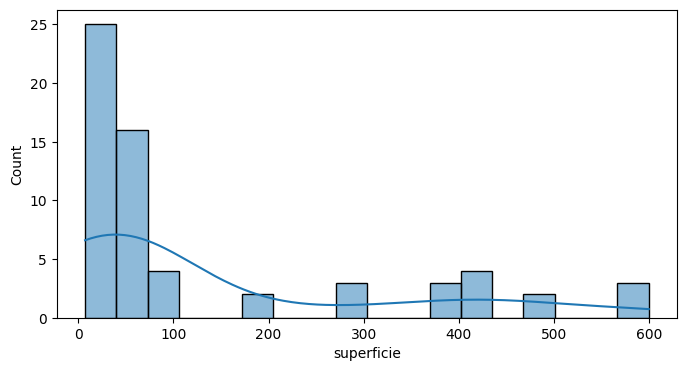

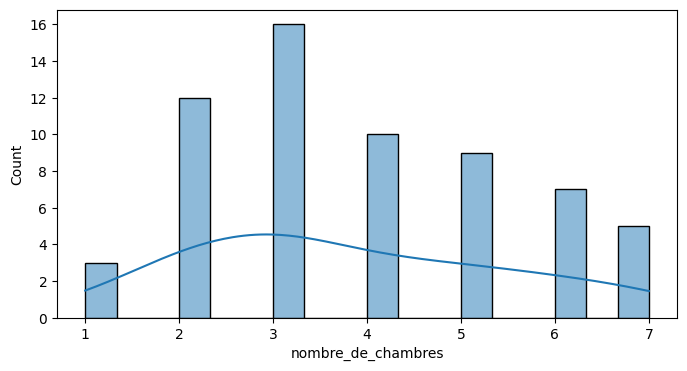

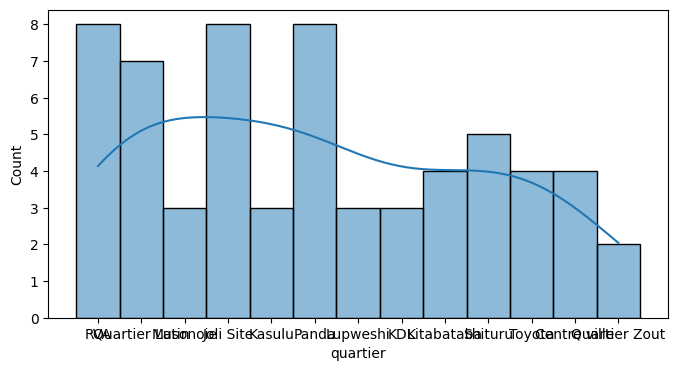

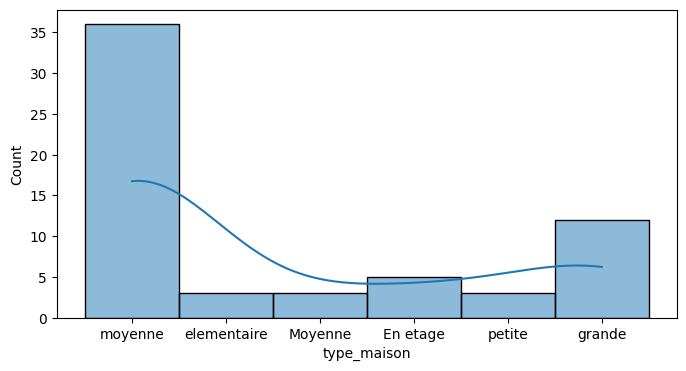

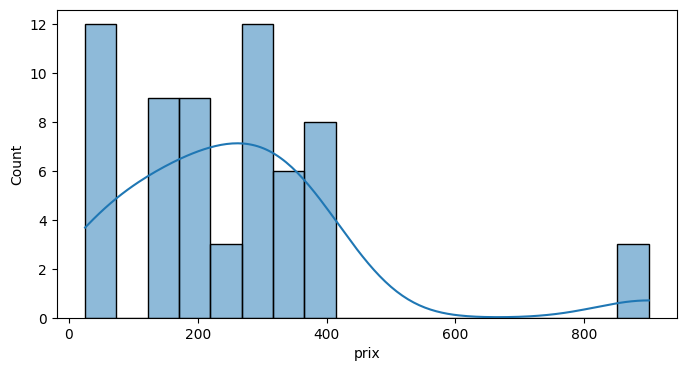

In [124]:
for col in df.columns:
  plt.figure(figsize=(8, 4))
  sns.histplot(data = df, x = col, kde=True, bins=18)

plt.show()

#### 2.2.2. Encodage des variables categorielles

In [183]:
label_encoder = LabelEncoder()
dummy_df = pd.get_dummies(df['quartier'], drop_first=False, prefix='quartier')
#dummy_df2 = pd.get_dummies(df['type_maison'], drop_first=False, prefix='type_maison')


In [184]:
df = pd.concat([df, dummy_df], axis=1)

In [185]:
df

,superficie,nombre_de_chambres,quartier,type_maison,prix,quartier_Centre ville,quartier_Joli Site,quartier_KDL,quartier_Kasulu,quartier_Kitabataba,...,quartier_Kasulu,quartier_Kitabataba,quartier_Lupweshi,quartier_Musonoie,quartier_Panda,quartier_Quartier Latin,quartier_Quartier Zout,quartier_RVA,quartier_Shituru,quartier_Toyota
0,7,2,RVA,moyenne,50,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,25,6,Quartier Latin,elementaire,400,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,8,1,Musonoie,Moyenne,25,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,30,4,Joli Site,moyenne,200,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,3,Kasulu,moyenne,60,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,300,5,Toyota,moyenne,200,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
58,600,7,Centre ville,moyenne,60,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59,20,2,RVA,moyenne,300,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
60,8,3,Quartier Latin,grande,200,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### 2.3 Analyse bivariée

In [186]:
df.columns

Index(['superficie', 'nombre_de_chambres', 'quartier', 'type_maison', 'prix',
       'quartier_Centre ville', 'quartier_Joli Site', 'quartier_KDL',
       'quartier_Kasulu', 'quartier_Kitabataba', 'quartier_Lupweshi',
       'quartier_Musonoie', 'quartier_Panda', 'quartier_Quartier Latin',
       'quartier_Quartier Zout', 'quartier_RVA', 'quartier_Shituru',
       'quartier_Toyota', 'type_maison_En etage', 'type_maison_Moyenne',
       'type_maison_elementaire', 'type_maison_grande', 'type_maison_moyenne',
       'type_maison_petite', 'quartier_Centre ville', 'quartier_Joli Site',
       'quartier_KDL', 'quartier_Kasulu', 'quartier_Kitabataba',
       'quartier_Lupweshi', 'quartier_Musonoie', 'quartier_Panda',
       'quartier_Quartier Latin', 'quartier_Quartier Zout', 'quartier_RVA',
       'quartier_Shituru', 'quartier_Toyota'],
      dtype='object')

In [187]:
target = df['prix']
features = df.drop(columns=['prix', 'quartier', 'type_maison'])

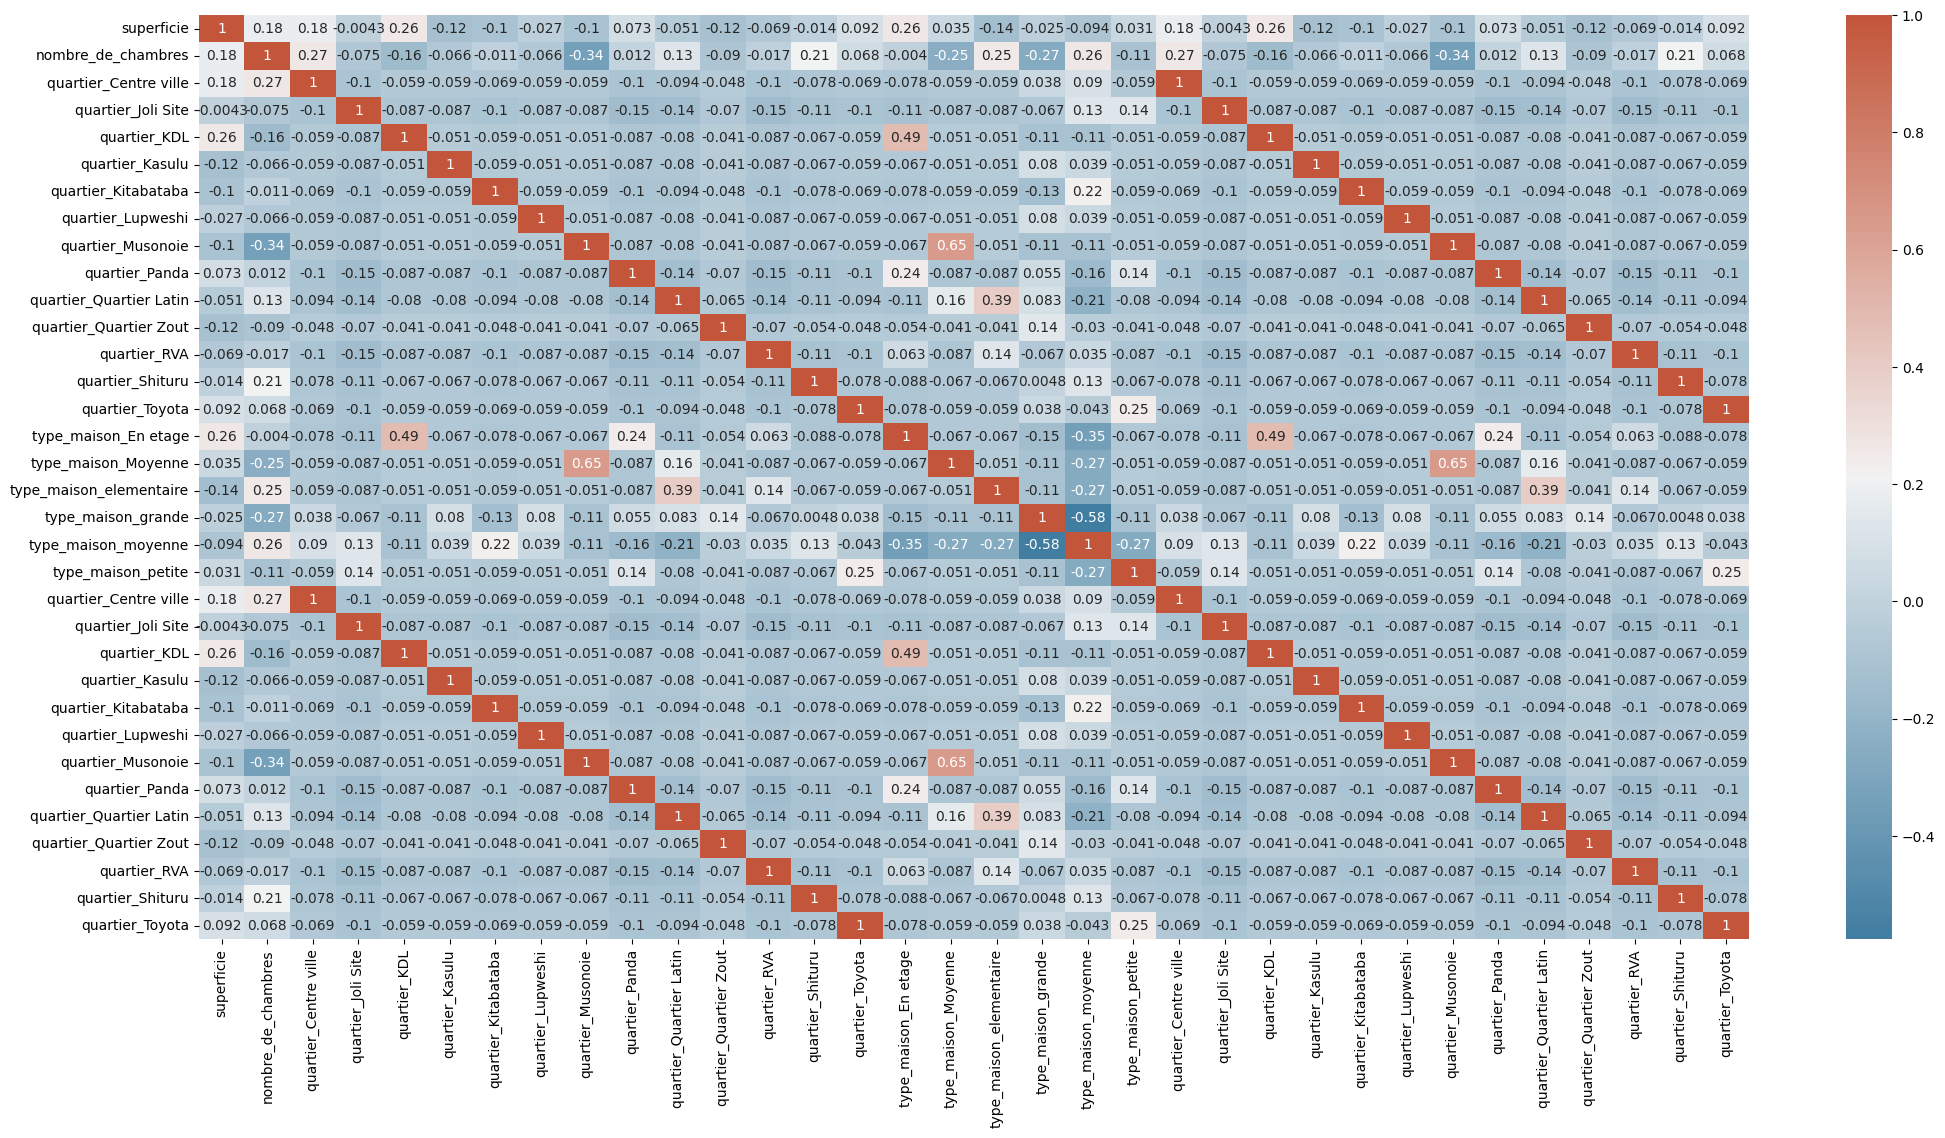

In [189]:
# Matrice de correlation
plt.figure(figsize=(25, 12))
cmap = sns.diverging_palette(235,20, as_cmap=True)
sns.heatmap(features.corr(), annot=True, cmap=cmap)
plt.show()

## 3. Creation du modele de regression lineaire

#### 3.1 Diviser notre dataset

In [190]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=8)

In [191]:
# Creation du modele de regression lineaire
lr_model = LinearRegression()

# Entrainer le modele de regression linaire
lr_model.fit(X_train, y_train)

LinearRegression()

#### 3.2 Prediction

In [192]:
train_predict = lr_model.predict(X_train)

In [193]:
train_predict

array([187.83282824, 348.71130355, 900.        , 194.57456356,
       158.50142403, 343.06602563, 222.49574495, 279.68221673,
       298.03431596, 331.22505049, 307.36865704, 344.25270066,
       285.69703551, 410.69881798, 395.89624096, 133.22653833,
       375.63930792, 148.03292965, 243.54761067, 106.1527929 ,
       213.39718922, 307.97108554,  67.71780376, 165.42543644,
       230.6053938 , 122.28219624, 282.0307163 , 285.78359272,
       289.60676161, 452.26448218, 307.36865704, 315.7711294 ,
       214.08650317, 191.68002836, 228.30655815, 197.73551782,
       159.47883208, 110.81427745, 361.39739193, 268.03292965,
       283.95664438, 165.49365086, 241.08804805, 263.46142659,
       288.96072626, 153.56748787, 311.21447599, 200.        ,
       305.86495235])

In [194]:
r2 = r2_score(y_train, train_predict)
print(f'R2 est de : {r2}')

R2 est de : 0.38060293988275473


#### 3.3 Test sur les donnees

In [176]:
test_predict = lr_model.predict(X_test)

In [177]:
r2Test = r2_score(y_test, test_predict)
print(f'R2 est de : {r2Test}')
#

R2 est de : -4.971704954131278


In [178]:
MSE = mean_squared_error(y_test, test_predict)
print(f'MSE est de : {MSE}')

MSE est de : 51526.273160439225


In [179]:
MAE = mean_absolute_error(y_test, test_predict)
print(f'MAE est de : {MAE}')


MAE est de : 141.28465142390675
